In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# load data
#df = sns.load_dataset('iris')
df=pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [1]:
#Checking the classes are perfectly balanced!!
df['Species'].hist(bins =10, figsize=(15,6));
df['Species'].value_counts()

NameError: name 'df' is not defined

In [4]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [5]:
df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


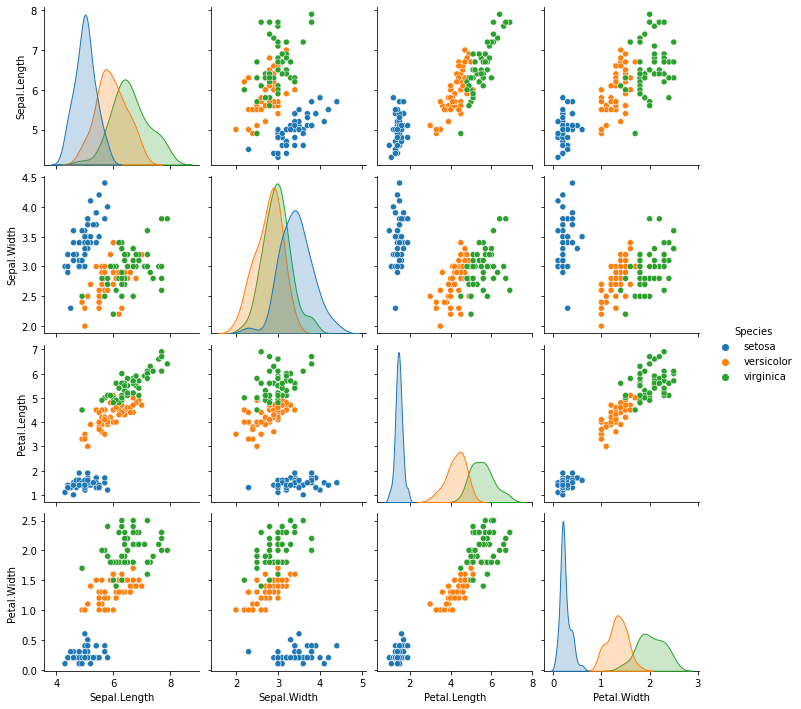

In [36]:
sns.pairplot(df, hue='Species')

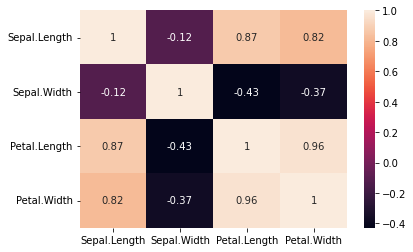

In [6]:
sns.heatmap(df.corr(), annot=True)

In [51]:
#Label Encoder
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['Species'] = le.fit_transform(df['Species'])

In [7]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

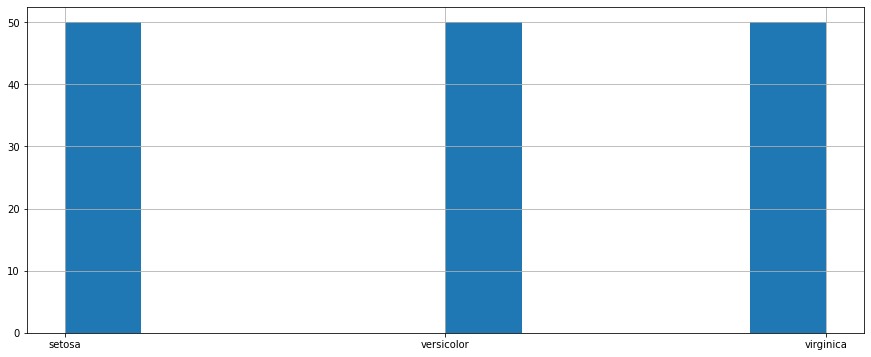

In [7]:
#Checking the classes are perfectly balanced!!
df['Species'].hist(bins =10, figsize=(15,6));
df['Species'].value_counts()

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df[['Species']]
#train -->70
#test -->30
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.30,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(f'Records in training data: {x_train.shape[0]:,}')
print(f'Records in test data: {x_test.shape[0]:,}')
print('\nFeatures:')
print(*x_train.columns, sep='\n')

(105, 4)
(45, 4)
(105, 1)
(45, 1)
Records in training data: 105
Records in test data: 45

Features:
Sepal.Length
Sepal.Width
Petal.Length
Petal.Width


In [9]:
#Model Selection
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 100.0


C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
#Model Selection
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [56]:
#Model Selection
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
#Model Selection
from sklearn.svm import SVC
model =SVC()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#Model Selection
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 73.33333333333333


C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#Model Selection
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()

#Model Training
model.fit(x_train,y_train)

#Metric and get performence
print("Accuracy:",model.score(x_test,y_test)*100)

<ipython-input-10-d4a871870e8e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Accuracy: 97.77777777777777


In [12]:
#Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
ypred = model.predict(x_train)
Confusion_Matrix = confusion_matrix(y_train, ypred)
Confusion_Matrix

array([[36,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 36]], dtype=int64)

In [13]:
acc = accuracy_score(y_train, ypred)
acc

1.0

In [20]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score , precision_score,recall_score,f1_score

print( " Accuracy Score ", accuracy_score(y_train, ypred))
print( " precision Score ", precision_score(y_train, ypred, average = 'weighted'))
print( " recall Score ", recall_score(y_train, ypred, average = 'weighted'))
print( " f1 Score ", f1_score(y_train, ypred, average = 'weighted'))

 Accuracy Score  1.0
 precision Score  1.0
 recall Score  1.0
 f1 Score  1.0


In [12]:
#Save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [13]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [14]:
load_model = pickle.load(open(filename,'rb'))

In [16]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)